# 국민카드 데이터 조사

- foodlife: 식생활 업종별 이용금액 비중 변화
  - 출처 : https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=4311a990-bf3e-11ea-b750-f709623afb72
- homefood: 연령대별 집밥 카테고리별 이용금액 변화율
  - 출처 : https://www.findatamall.or.kr/fsec/dataProd/generalDataProdDetail.do?cmnx=44&goods_id=c1465130-bf3e-11ea-a506-cf31c4c94055


In [1]:
from google.colab import drive
drive.mount('/content/drive')

RUN_MODE = False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame as df

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# 한글화
import matplotlib as mpl

# 코랩에서만 적용
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum # 폰트 설치
import matplotlib.font_manager as fm
# 실제 파일 > 우클릭 > 경로복사
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties( fname=path, size=10 )
plt.rc( 'font', family=font.get_name() )
mpl.font_manager._rebuild()

# 빌트인
%matplotlib inline

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
path1 = '/content/drive/My Drive/Phoenix/Extra_Data/KBcard_data/FoodLife.xlsx'
foodlife=pd.read_excel(path1)
path2 = '/content/drive/My Drive/Phoenix/Extra_Data/KBcard_data/Homefood.xlsx'
homefood=pd.read_excel(path2)

In [5]:
foodlife.iloc[:,2:] = foodlife.iloc[:,2:].apply(lambda x:round(x*100,2))

In [6]:
foodlife

,기준년도,식생활 종류 구분,T01 (1.01~1.14),T02 (1.15~1.28),T03 (1.29~2.11),T04 (2.12~2.25),T05 (2.26~3.10),T06 (3.11~3.24),T07 (3.25~4.07),T08 (4.08~4.21),T09 (4.22~5.05),T10 (5.06~5.19),T11 (5.20~6.02),T12 (6.03~6.16)
0,2019년,1.음식점,81.03,79.12,73.73,82.37,81.71,81.39,80.75,80.69,80.39,80.70,80.29,79.79
1,2019년,2.집밥,14.91,16.74,22.22,13.10,13.89,13.98,14.74,14.62,14.93,14.37,14.80,14.93
2,2019년,3.배달앱,4.06,4.14,4.04,4.53,4.40,4.64,4.51,4.69,4.68,4.93,4.91,5.28
3,2020년,1.음식점,77.37,69.42,76.12,73.97,67.13,69.64,70.11,71.54,73.45,73.83,73.55,73.83
4,2020년,2.집밥,15.95,24.19,15.75,17.43,21.75,20.15,20.05,19.24,18.44,18.58,19.44,17.83
5,2020년,3.배달앱,6.68,6.39,8.13,8.59,11.13,10.21,9.85,9.22,8.11,7.60,7.01,8.34


In [7]:
foodlife=foodlife.T

In [8]:
foodlife.columns=['2019_음식점', '2019_집밥', '2019_배달앱', '2020_음식점', '2020_집밥', '2020_배달앱']

In [9]:
foodlife=foodlife.iloc[2:,:]

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


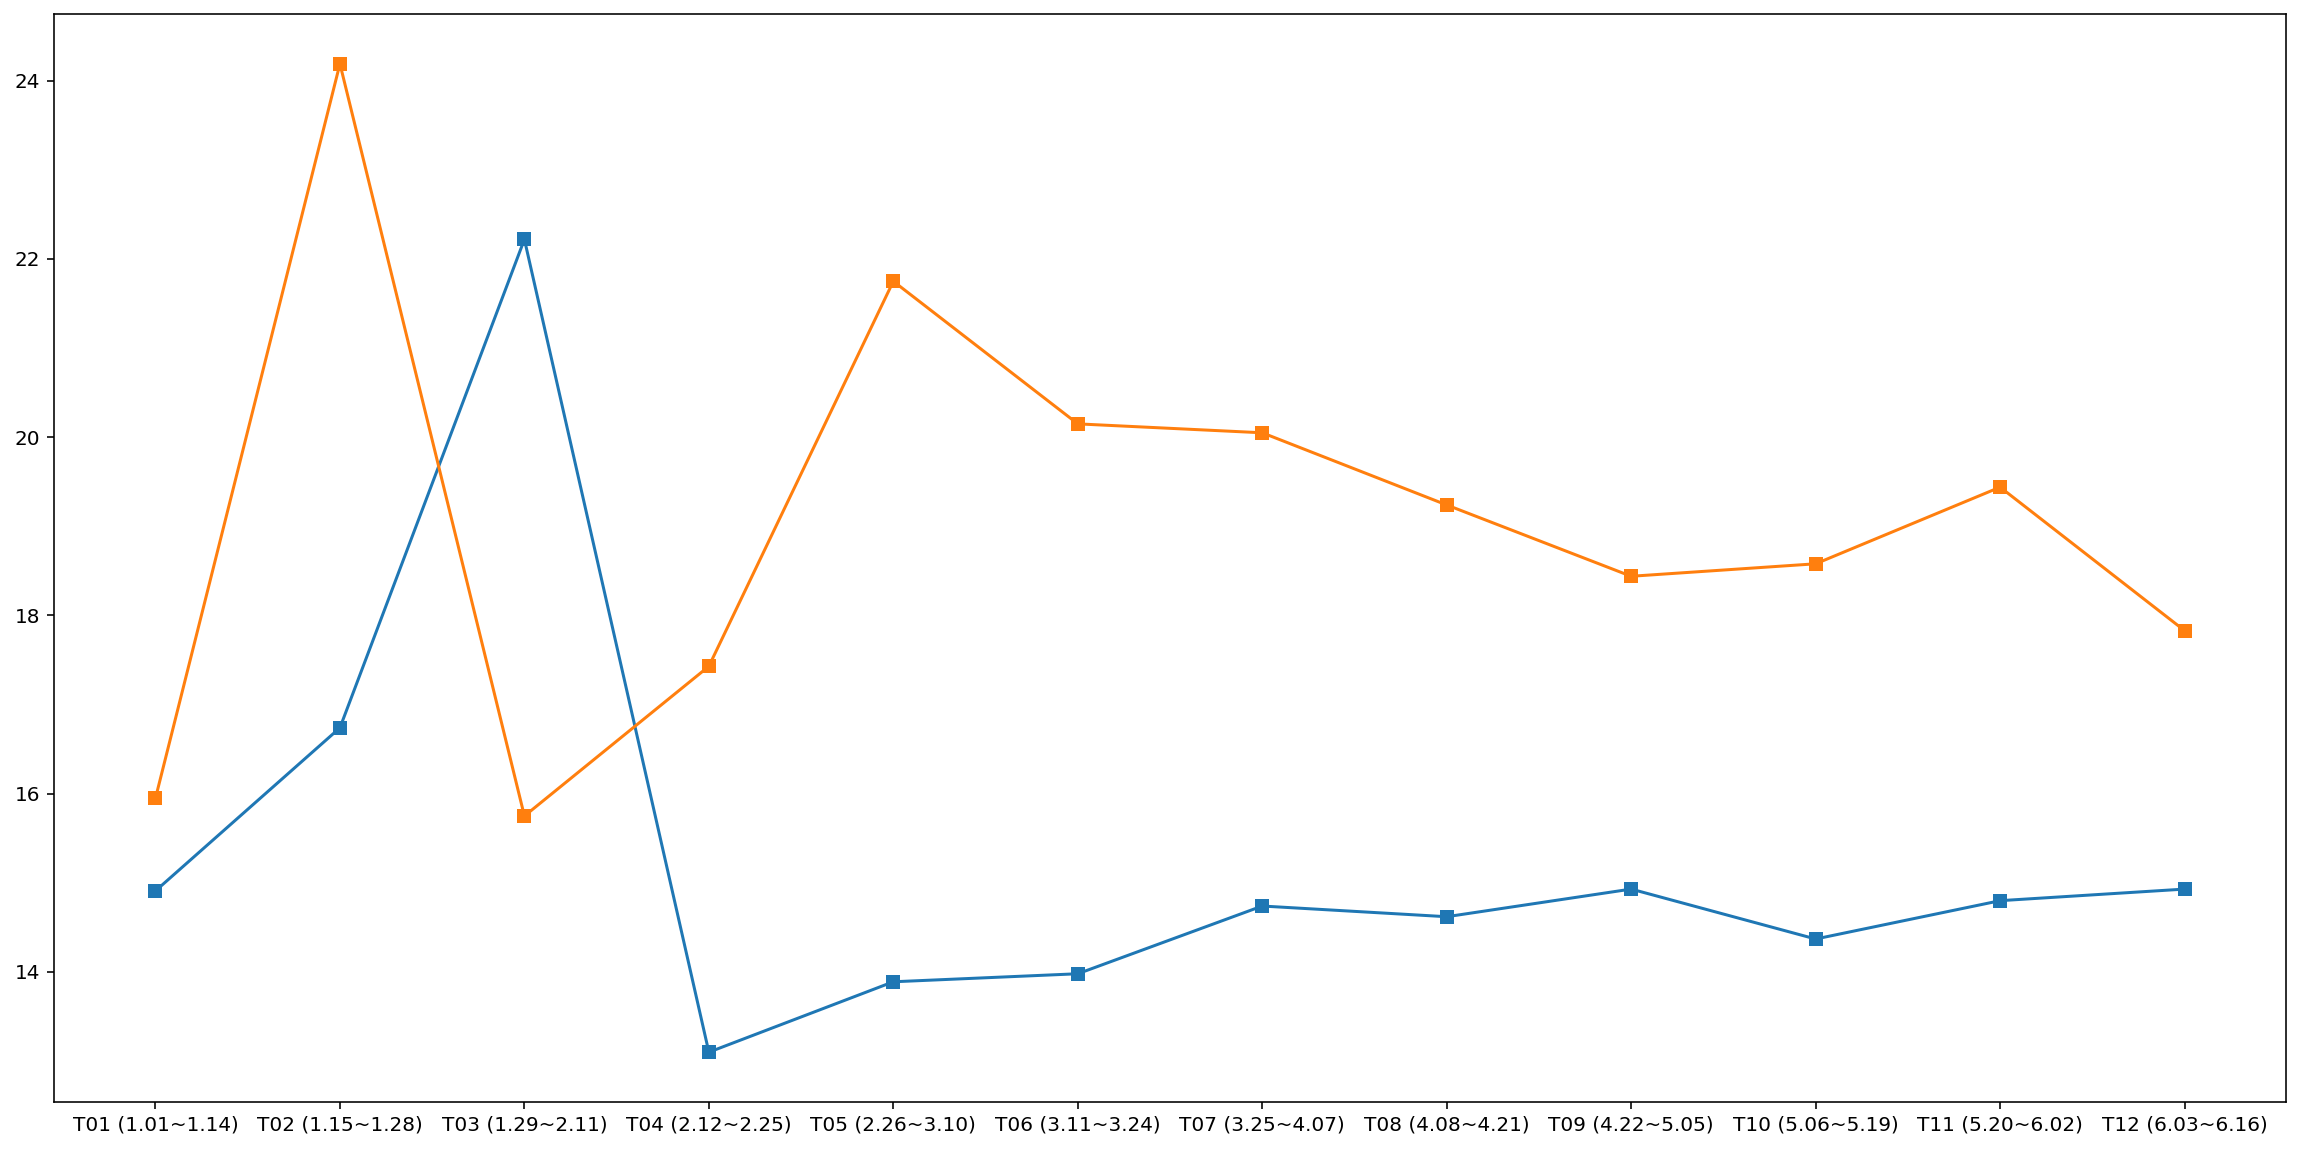

In [10]:
plt.figure(figsize=(20,10))
plt.plot(foodlife.index, foodlife['2019_집밥'],marker='s')
plt.plot(foodlife.index, foodlife['2020_집밥'],marker='s')
plt.show()

In [11]:
# import matplotlib.pyplot as plt

# colors = ['#ff9999','#66b3ff','#99ff99']
 
# plt.pie(foodlife.iloc[:3,1:3]['T01 (1.01~1.14)'], colors = colors, labels=foodlife['식생활 종류 구분'][:3], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
# plt.pie(foodlife.iloc[3:,1:3]['T01 (1.01~1.14)'], colors = colors, labels=foodlife['식생활 종류 구분'][:3], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

# plt.tight_layout()
# plt.show()

In [12]:
# li=list()
# for x in range(2):
#   for y in range(12):
#     a = x, y
#     li.append(a)

In [13]:

# fig, axs = plt.subplots(2, 12, figsize=(20,10))

# for x, y in li : 
#   if x == 0:
#     axs[x, y].pie(foodlife[0:3][cols[y]], colors = colors, labels=foodlife['식생활 종류 구분'][:3], 
#                     autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#   else: 
#     axs[x, y].pie(foodlife[3:][cols[y]], colors = colors, labels=foodlife['식생활 종류 구분'][:3], 
#                     autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)


# plt.show()

In [14]:
foodlife.iloc[:,3:]

,2020_음식점,2020_집밥,2020_배달앱
T01 (1.01~1.14),77.37,15.95,6.68
T02 (1.15~1.28),69.42,24.19,6.39
T03 (1.29~2.11),76.12,15.75,8.13
T04 (2.12~2.25),73.97,17.43,8.59
T05 (2.26~3.10),67.13,21.75,11.13
T06 (3.11~3.24),69.64,20.15,10.21
T07 (3.25~4.07),70.11,20.05,9.85
T08 (4.08~4.21),71.54,19.24,9.22
T09 (4.22~5.05),73.45,18.44,8.11
T10 (5.06~5.19),73.83,18.58,7.6


<Figure size 432x288 with 0 Axes>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49373 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54876 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49548 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph

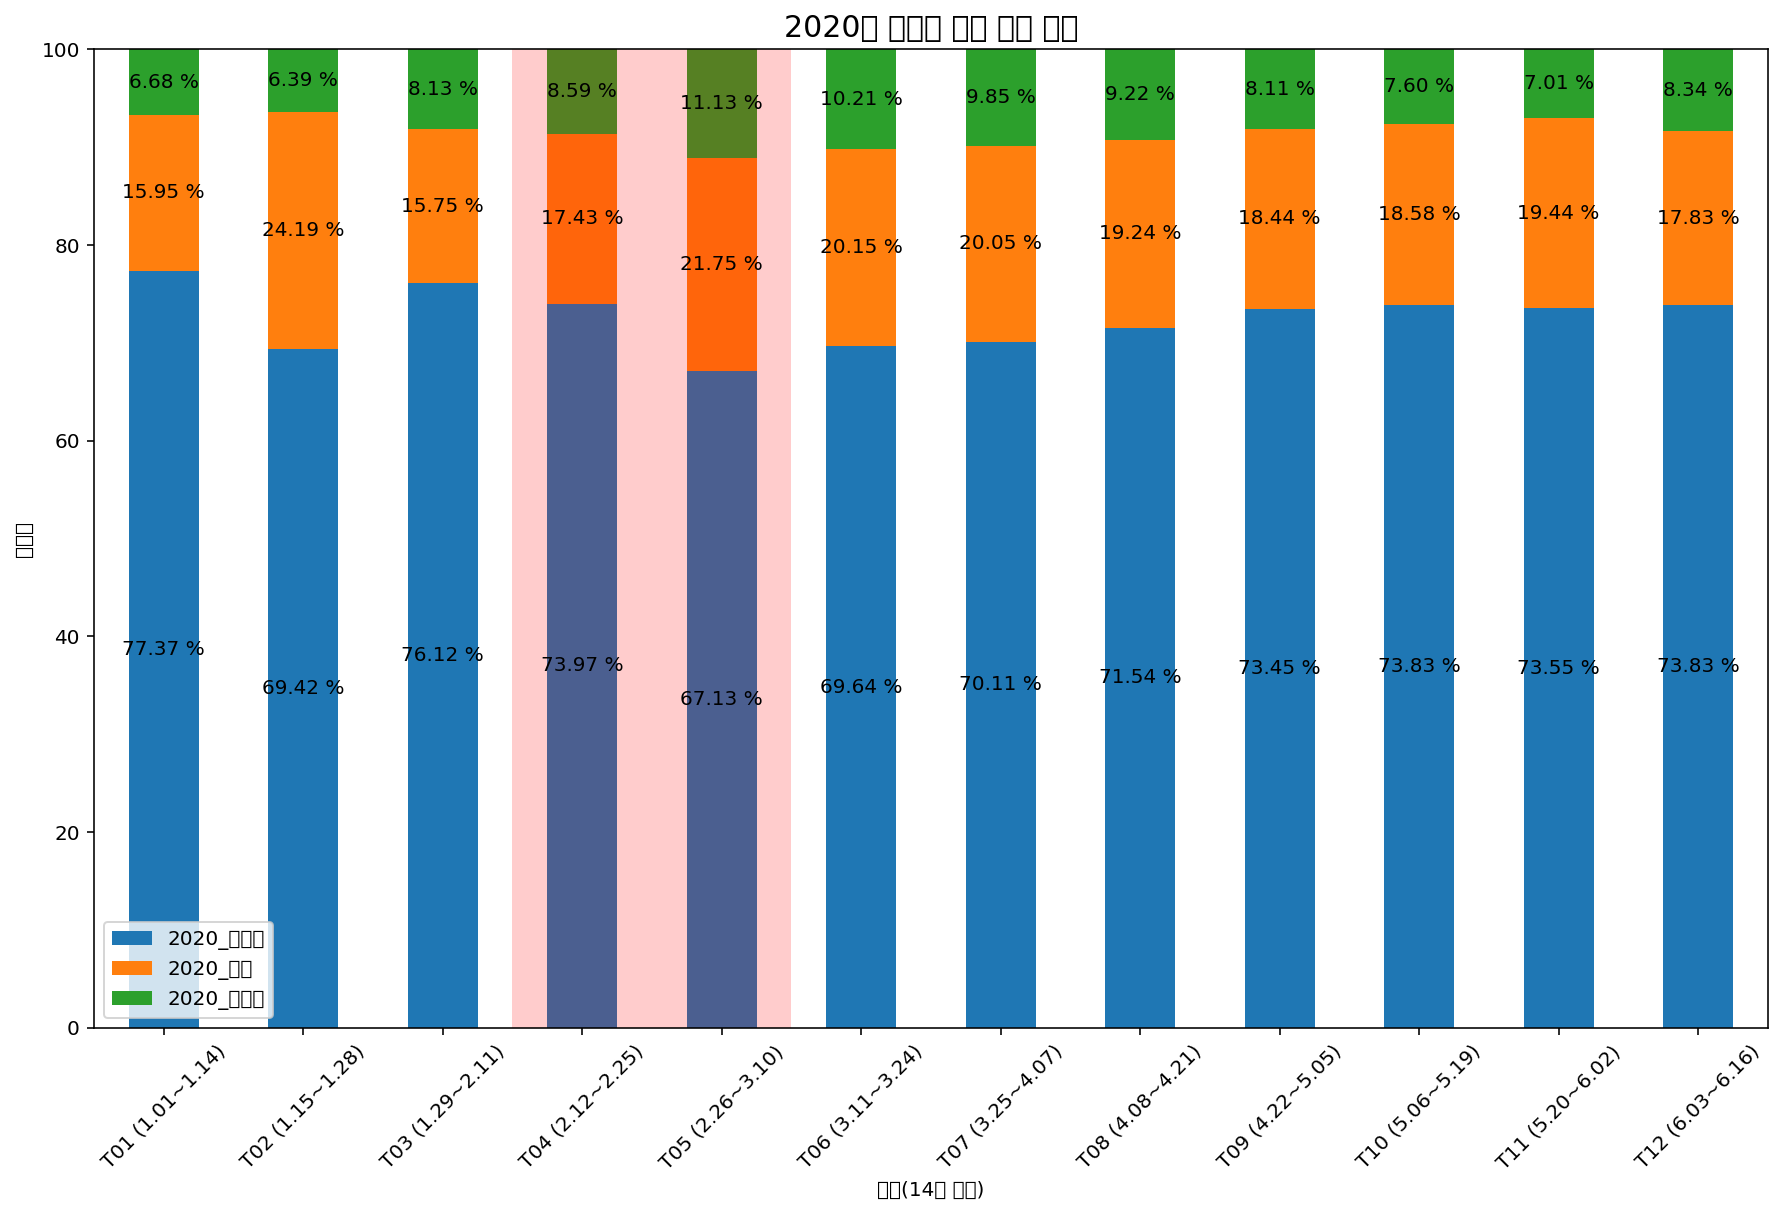

In [15]:
plt.figure()

ax = foodlife.iloc[:,3:].plot(kind='bar', stacked=True, rot=45, figsize=(15,9))

for p in ax.patches: 
  left, bottom, width, height = p.get_bbox().bounds 
  ax.annotate("%.2f %%"%height, (left+width/2, bottom+height/2), ha='center', va='center')
plt.axvspan(2.5, 4.5, 0, 100, facecolor='red', alpha=0.2)
plt.ylim(0,100)
plt.ylabel('퍼센트')
plt.xlabel('시기(14일 간격)')
plt.title('2020년 식생활 소비 비율 변화', fontdict={'fontsize': 15})
plt.show()


xy=(left+width/2, bottom+height/2), ha='center', va='center' 가 핵심이다.

left+width/2 는 현재 막대 그래프의 가운데 x위치, bottom+height/2 는 y위치값을 갖는다.
ha=center, va=center 로, 현재 막대 그래프의 축을 수평, 수직 가운데로 정렬한다.



```

for p in ax.patches: 
  left, bottom, width, height = p.get_bbox().bounds 
  ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2), ha='center', va='center') 
plt.sca(ax) 
plt.box(False)
```

xy=(left+width/2, bottom+height/2), ha='center', va='center'

출처: https://dailyheumsi.tistory.com/98 [하나씩 점을 찍어 나가며]

출처: https://dailyheumsi.tistory.com/98 [하나씩 점을 찍어 나가며]

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44284 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51665 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48165 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52852 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53580 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44256 missing from current font.

/

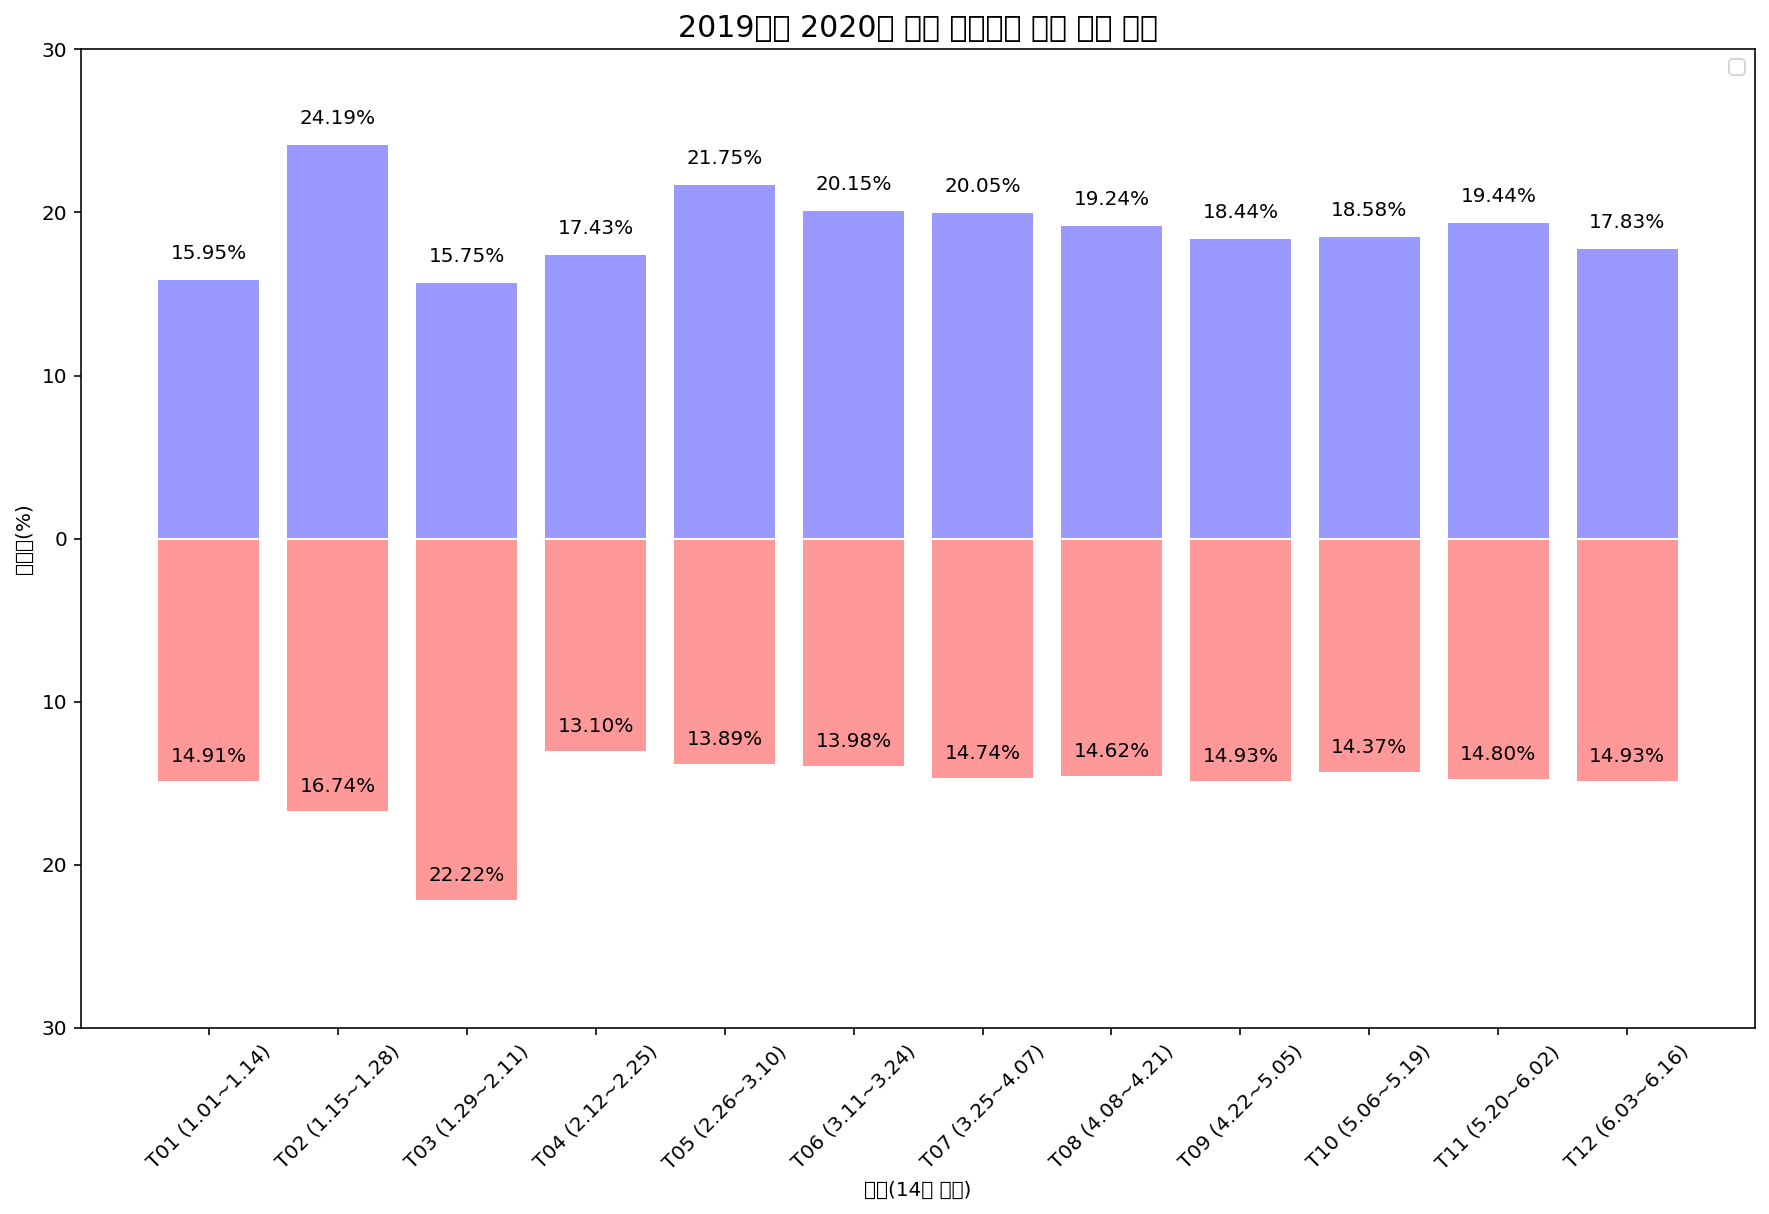

In [16]:
plt.figure(figsize=(15,9))
plt.bar(foodlife.index, foodlife['2020_집밥'], facecolor='#9999ff', edgecolor='white')
plt.bar(foodlife.index, -(foodlife['2019_집밥']), facecolor='#ff9999', edgecolor='white')
for x,y in zip(foodlife.index, foodlife['2020_집밥']):

    label = f"{y:.2f}%"

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
    
for x,y in zip(foodlife.index, foodlife['2019_집밥']):

    label = f"{y:.2f}%"

    plt.annotate(label, # this is the text
                 (x, -y), # this is the point to label
                 ha="center", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 textcoords="offset points")
    
plt.title('2019년과 2020년 집밥 카테고리 소비 비중 변화', fontdict={'fontsize': 15})
plt.xlabel('시기(14일 간격)')
plt.ylabel('퍼센트(%)')
plt.xticks(rotation=45)
plt.yticks(ticks=[-30, -20, -10, 0, 10, 20, 30],labels=['30','20','10','0','10','20','30'] )
plt.legend()
plt.ylim(-30, +30)
plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51665 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48165 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51665 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48165 missing from current font.



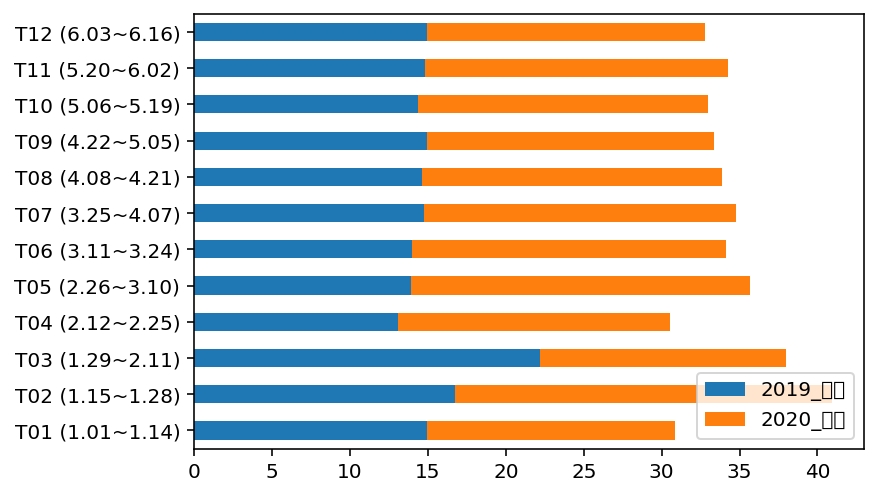

In [17]:
foodlife.iloc[:,[1,4]].plot(kind='barh', stacked=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51020 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51665 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48165 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48176 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45804 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

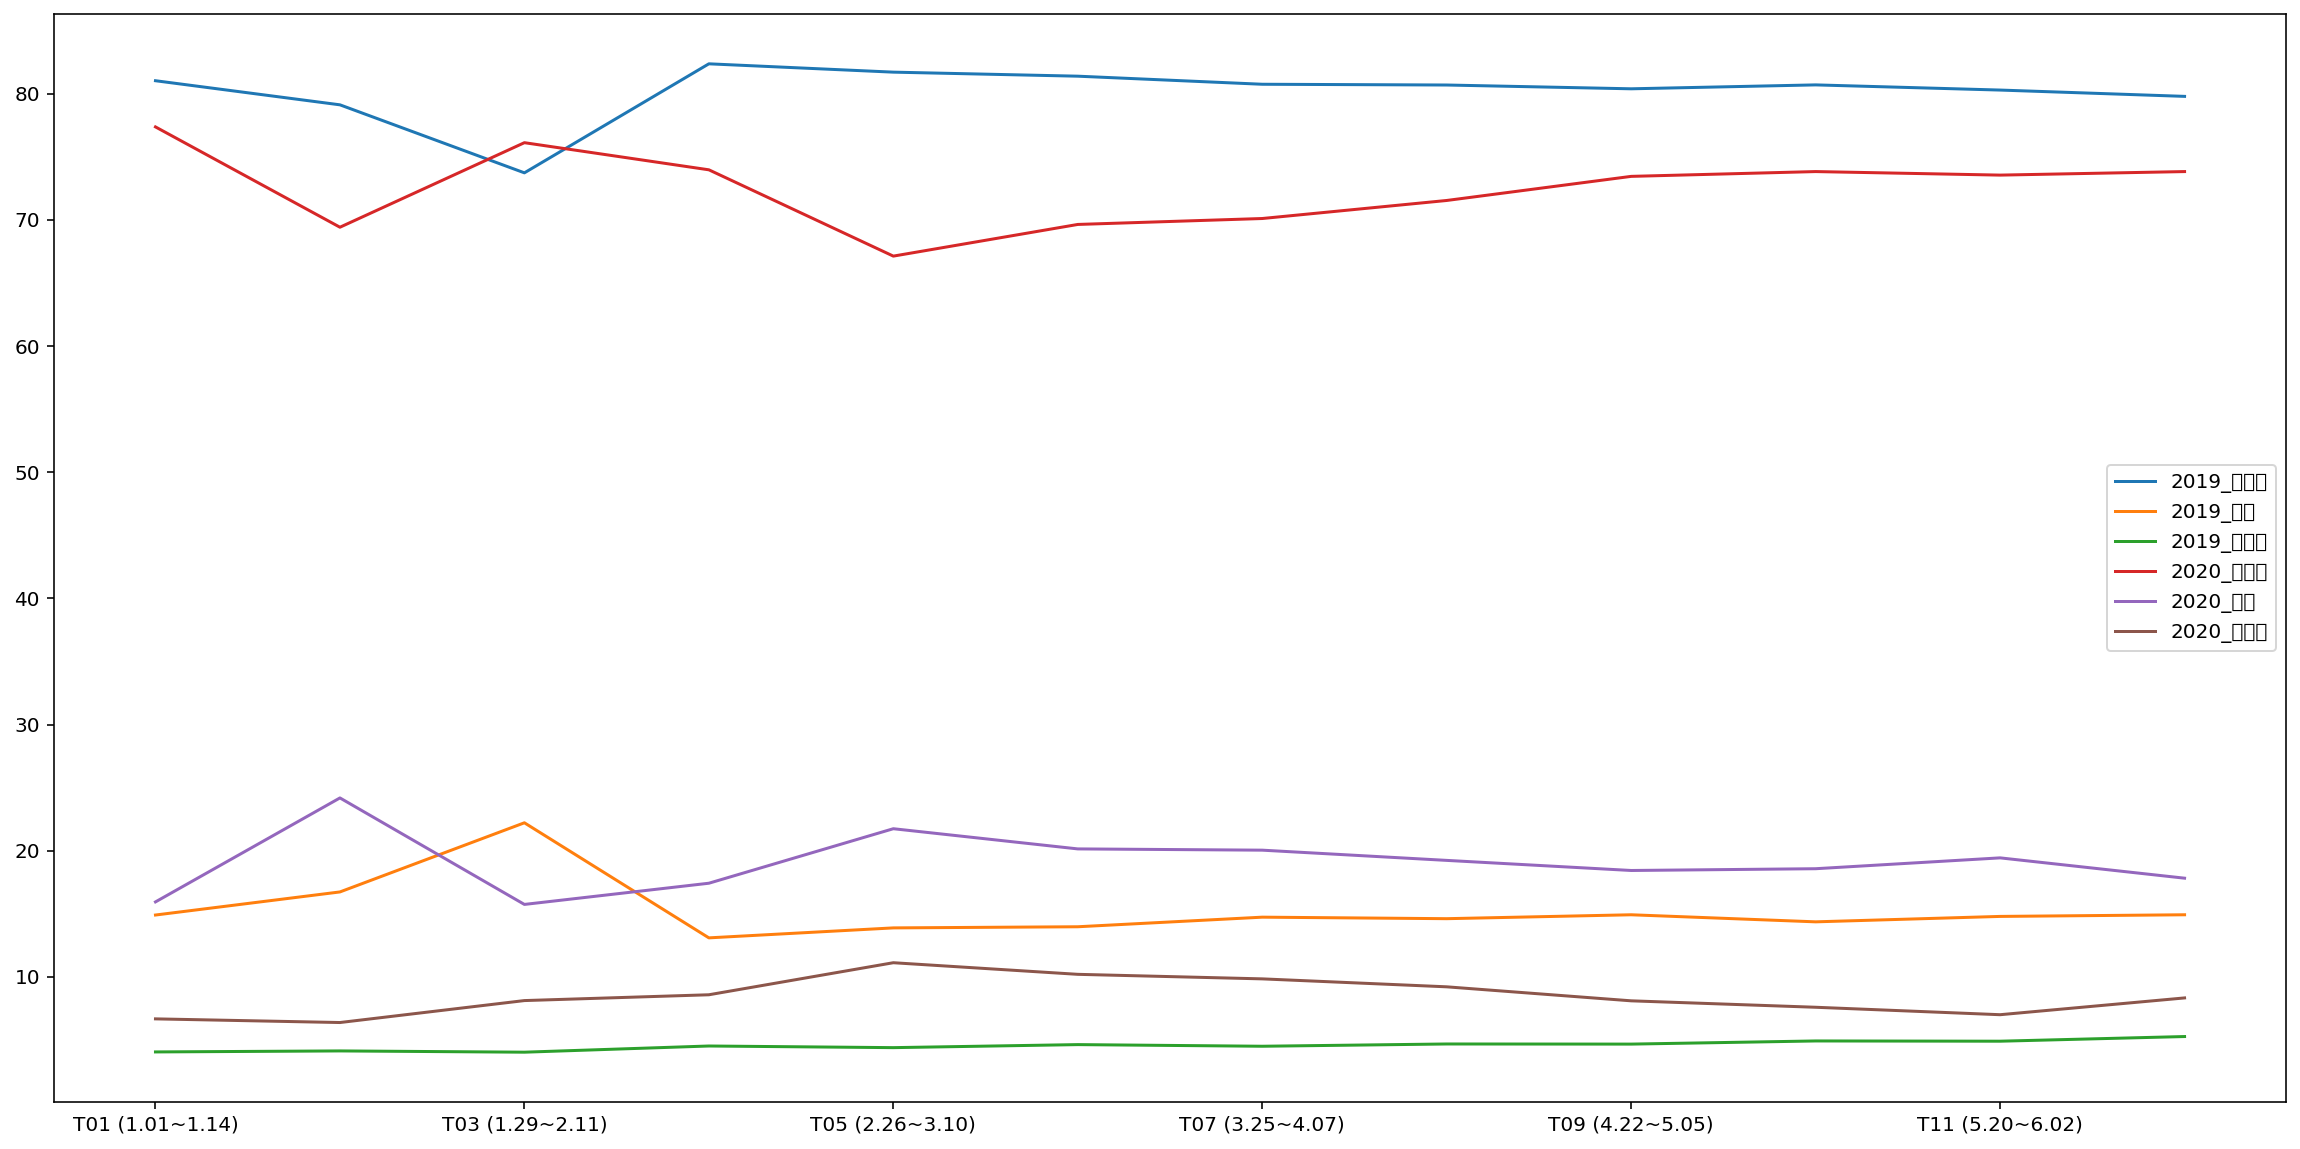

In [18]:
foodlife.plot(figsize=(20,10))

In [19]:
homefood['19년대비 성장률'] = homefood['19년대비 성장률'].apply(lambda x:round(x*100,2))

In [20]:
homefood.columns

Index(['집밥 종류 구분', '연령대', '19년대비 성장률'], dtype='object')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49885 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47308 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54408 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54032 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47588 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50724 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotli

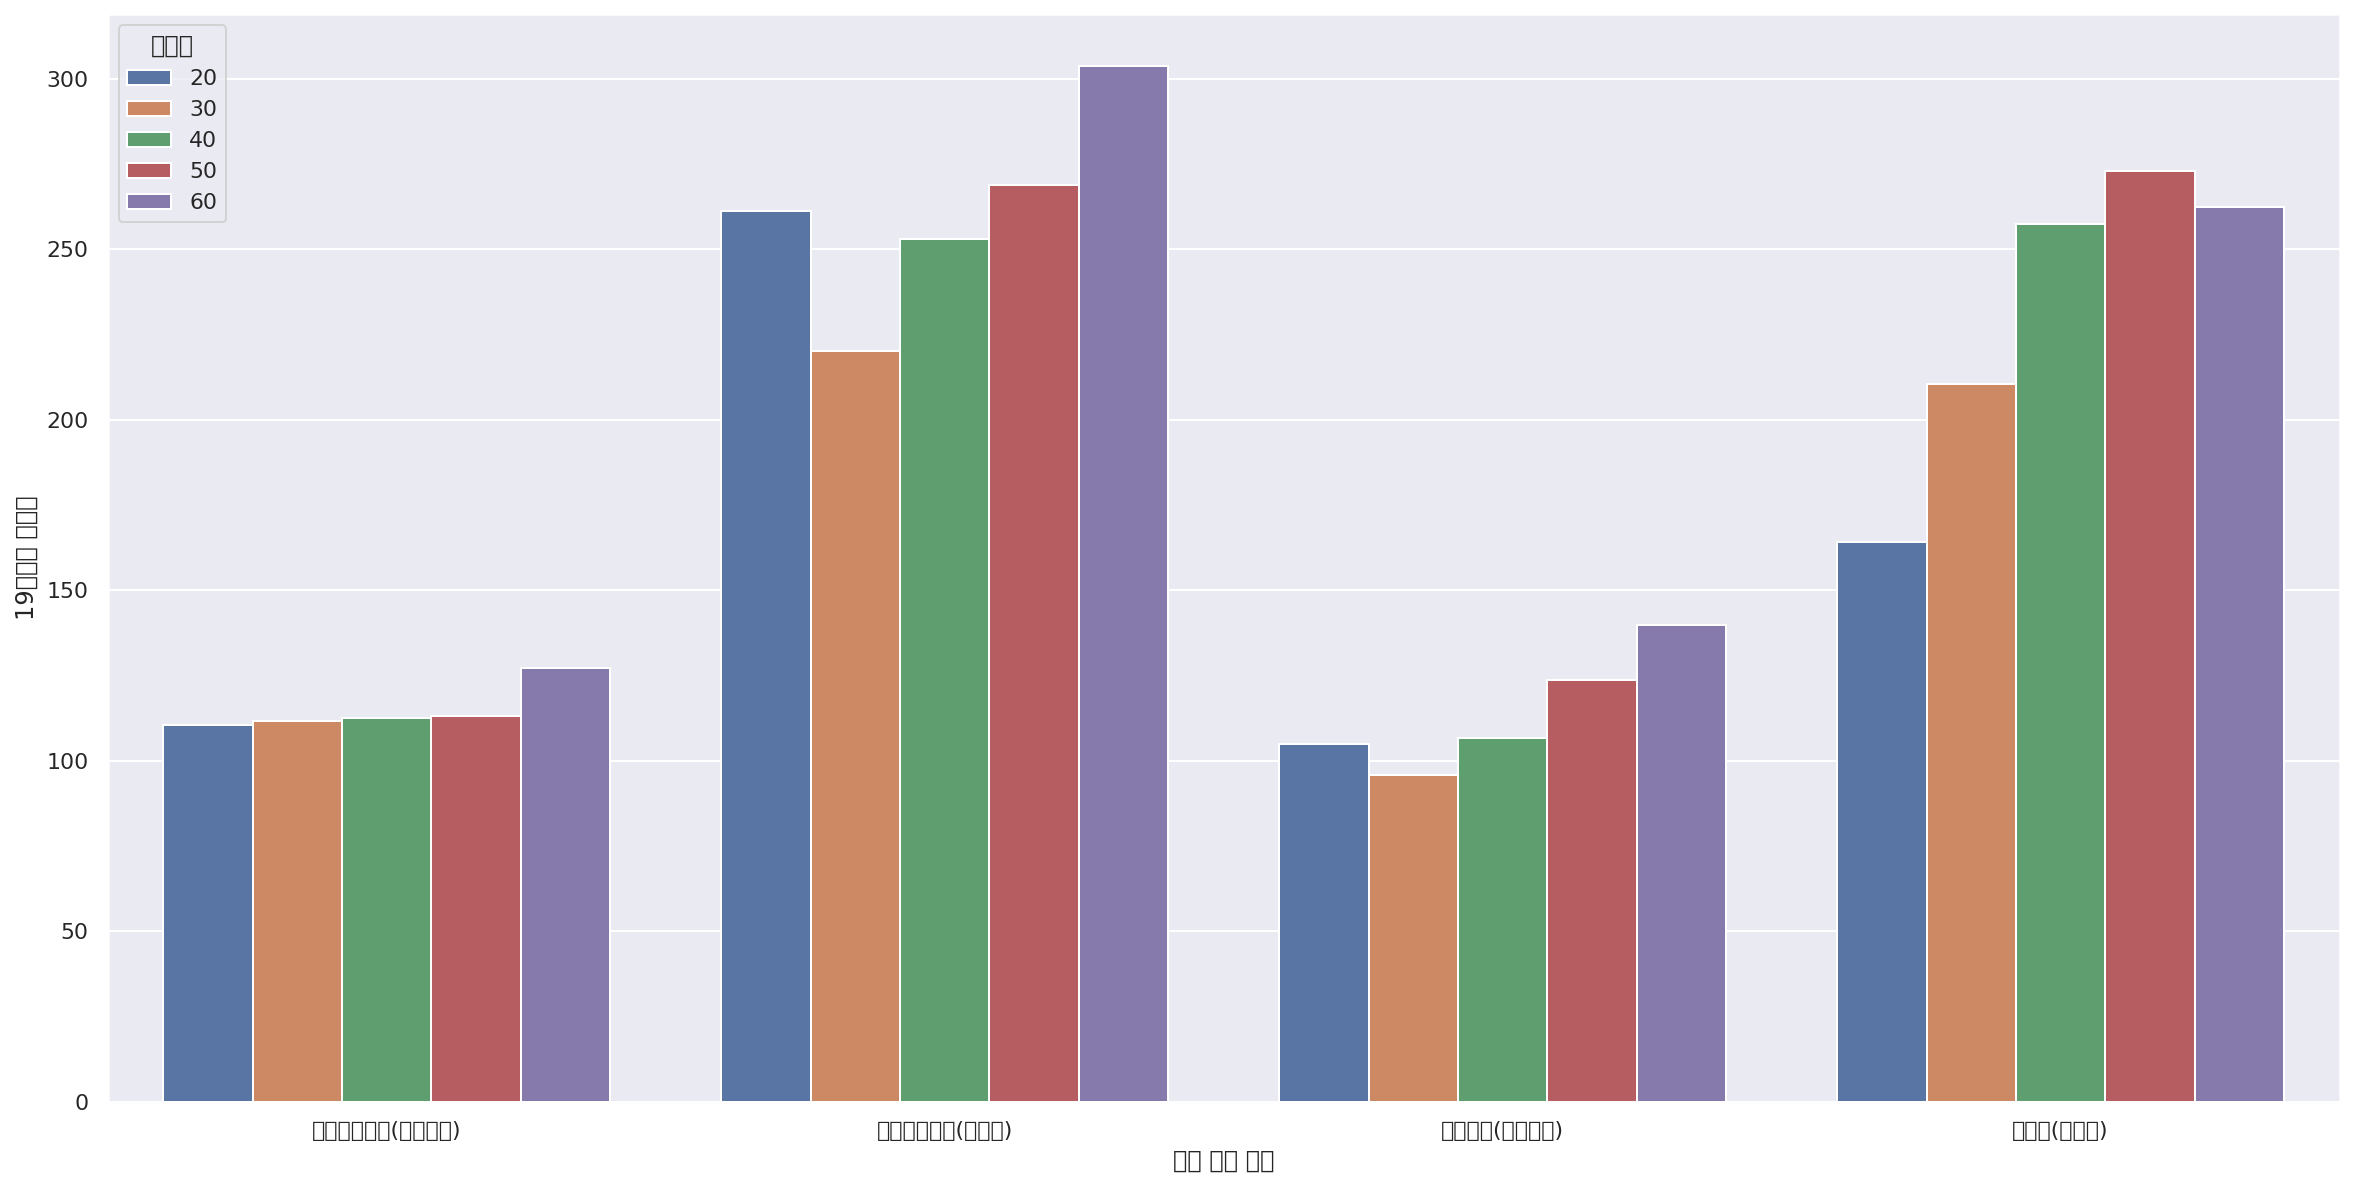

In [21]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.barplot(x='집밥 종류 구분', y='19년대비 성장률', hue='연령대', data=homefood)